In [101]:
# pip install mpld3

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import glob
# import matplotlib.pyplot as plt, mpld3
# mpld3.enable_notebook()

%matplotlib widget

In [103]:
# Calibration for x axis

m = 0.06275314836002217
b = -0.19536577738644514

In [104]:
from scipy.optimize import curve_fit

def gaussian(x,A,wc,g): #(input, area under peak, center energy, HWHM )
    return (A/(np.sqrt(2*np.pi)*g)) * np.exp(-(x-wc)**2 / (2*g**2))

def lorentzian(x,A,wc,g):
    return (A/(1 + ((x-wc)/g)**2)) / (np.pi*g)

def pseudoVoigt(x,A,wc,g,f): #(1, peak_value, std_dev, 1)
    return f*lorentzian(x,A,wc,g)+(1-f)*gaussian(x,A,wc,g/np.sqrt(2*np.log(2)))

def comptonProfile(x,A,wc,g,f,y0):
    return y0+pseudoVoigt(x,A,wc,g,f)

def comptonFit(x, y):
    peak_index = np.argmax(y)
    peak_value = x[peak_index]
    poissonError = np.sqrt(y)
    std_dev = np.sqrt(sum((x - peak_value) ** 2) / (sum(y)-1)) #sample standard deviation
    peak_Area = sum(input_y)
    print(peak_Area, peak_value, peak_index, std_dev)
    popt, pcov = curve_fit(comptonProfile, x, y, p0=[peak_Area, peak_value, std_dev, 1, 10], sigma = poissonError, maxfev=5000)
    return popt, pcov


# Background

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
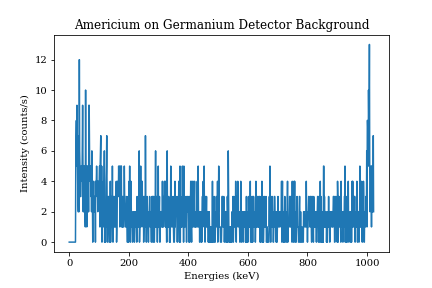

In [105]:
#%matplotlib qt
plt.rcParams.update({'font.size': 10})
plt.rcParams["font.family"] = "serif"
plt.title('Americium on Germanium Detector Background')
plt.xlabel('Energies (keV)')
plt.ylabel('Intensity (counts/s)')
background =np.loadtxt('Calibrations/BackgroundRadiationGe85gain1500volts840sec.Spe',skiprows=12, max_rows=1023)
plt.plot(background)

In [106]:
background

array([0., 0., 0., ..., 3., 7., 2.])

# Aluminum

In [107]:
# Read files

files = glob.glob('Americium_Aluminum/*.Spe')
am_al_dict = {}

for f in files:
    angle = f.split('AmericiumAl')[1].split('degrees')[0]
    time = f.split('volts')[1].split('sec')[0]
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    am_al_dict[angle] = entry

## Plot Raw Data

In [108]:
# Select compton energy peaks

am_al_dict['30']['x1'] = 650
am_al_dict['30']['x2'] = 937

am_al_dict['50']['x1'] = 650
am_al_dict['50']['x2'] = 935

am_al_dict['70']['x1'] = 650
am_al_dict['70']['x2'] = 935

am_al_dict['90']['x1'] = 600
am_al_dict['90']['x2'] = 900

am_al_dict['110']['x1'] = 620
am_al_dict['110']['x2'] = 870

am_al_dict['130']['x1'] = 650
am_al_dict['130']['x2'] = 850

# am_al_dict['150']['x1'] = 650
# am_al_dict['150']['x2'] = 800

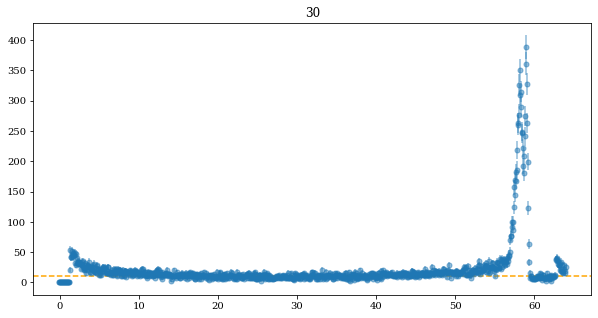

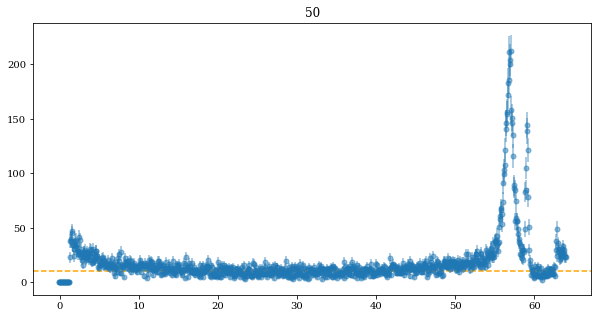

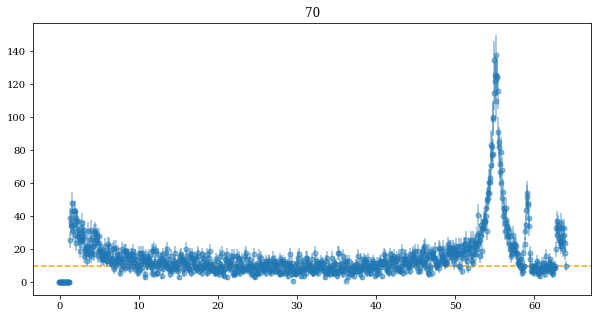

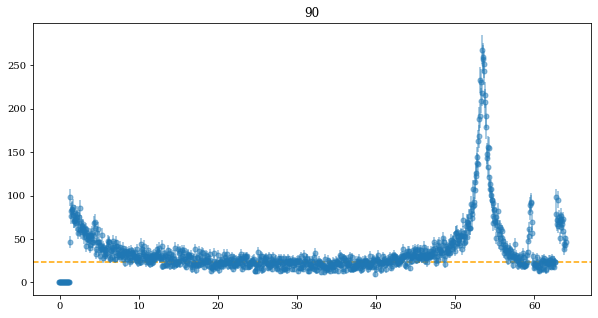

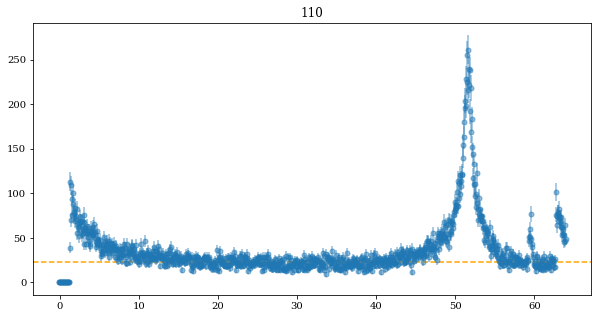

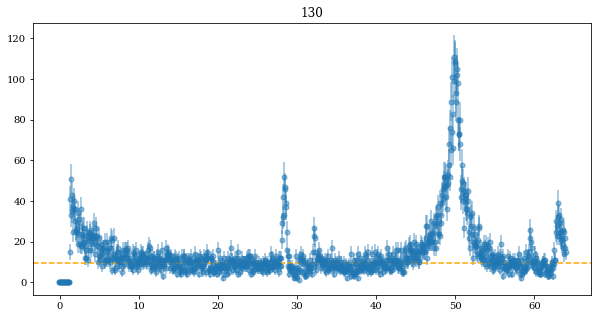

In [109]:
bins = np.linspace(1,1023,1023)

%matplotlib inline
for angle in ['30','50','70','90','110','130']:
    entry = am_al_dict[angle]
    plt.figure(figsize=(10,5))

    x1 = entry['x1']
    x2 = entry['x2']
    
    # Use average background
    bg_level = np.mean(entry['data'][200:600])
    #bg_level_poisson_error = np.sqrt(entry['data'][200:600])/int(entry['time'])

    plt.errorbar(bins*m+b, entry['data'], yerr=np.sqrt(entry['data']),fmt='o',markersize=5, alpha = 0.5, label='data') 
    plt.axhline(bg_level,linestyle='dashed',c='orange')
    plt.title(angle)
    

22160.0 930.0 279 26.944701846670803
8090.334842132974 930.3153797074068 8.924038685369245 0.9497062258028032 13.72502177664155
184.41047392269093 0.23247557720143514 0.4384742043937469 0.05977630860713632 0.2947008508823325


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
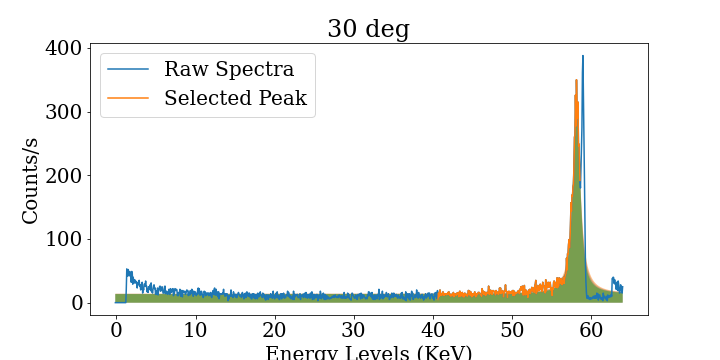

area:  21874.054529320096 22323.242735298343 21421.829545896762
18688.0 912.0 261 26.525090829266272
5252.229647636161 908.4322421003244 8.97961792407093 1.0001016895696824 12.163841570659056
116.68900987943513 0.21600529718818431 0.4708451856844649 0.06760025304312645 0.29702676520503013


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
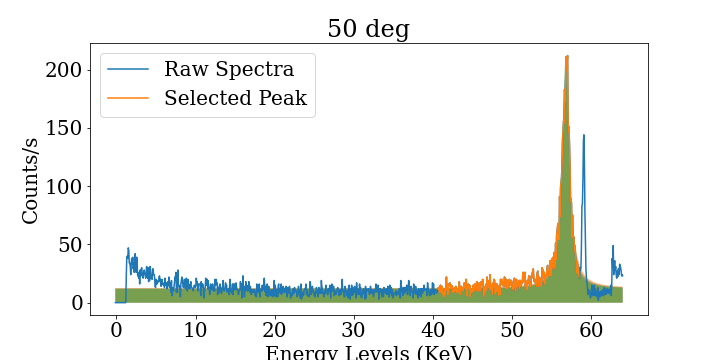

area:  17549.08890024424 17947.59580530292 17148.699600582164
16395.0 883.0 232 24.373748786127404
3911.7101278161413 881.0418085712931 10.06198266597522 1.136625198795741 11.05473192866133
114.46471330954414 0.3246939277483465 0.7944241060733157 0.08928171679351735 0.3326826444923447


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
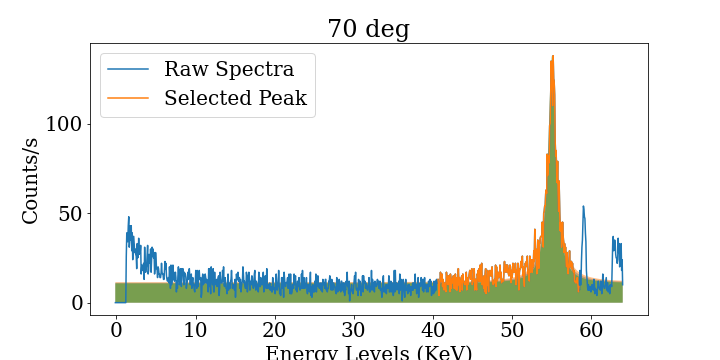

area:  15104.734675731146 15536.368421823581 14670.522247836738
36988.0 854.0 253 18.622844409043914
9309.002375942307 854.682731915739 11.881770343877122 1.2638042086517682 23.85444168553436
187.77886565775967 0.26909976414387604 0.6957867589700506 0.059410372655058705 0.4773285526394102


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
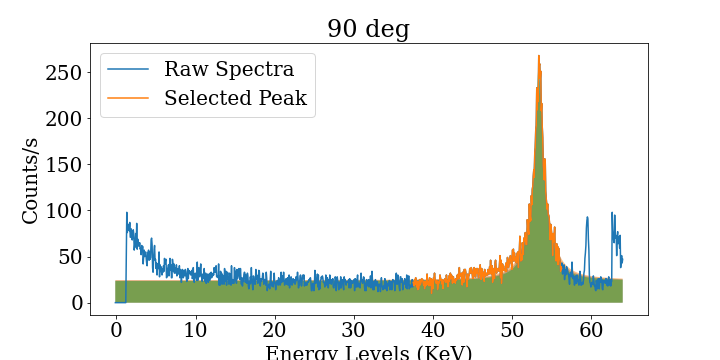

area:  33396.87235245359 34031.37030696918 32759.210258371597
36661.0 826.0 205 14.238267110579029
9715.311606651334 824.7104901601178 12.376257314139746 1.355455089163877 22.75099669033647
220.58610077371586 0.30098062600835124 0.7591039244623398 0.058059813292998454 0.6070738954089567


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
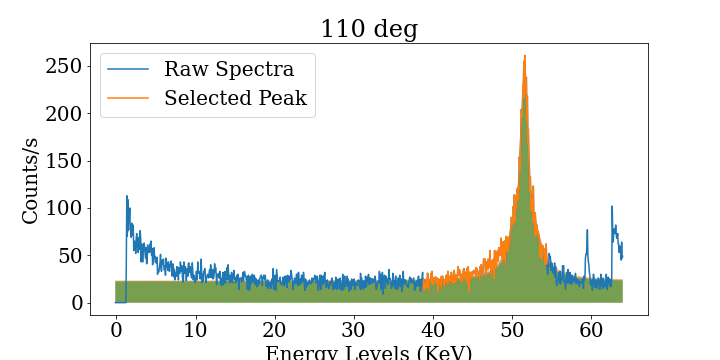

area:  32666.012152972962 33464.57614838837 31864.135592674596
14912.0 797.0 146 13.837660070869417
4539.258003958986 798.7381145140939 13.261654226991444 1.3385769091422715 7.992212928260514
156.66550719996692 0.43183620569260217 1.1145978703764086 0.07971873620115118 0.5023748337993812


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
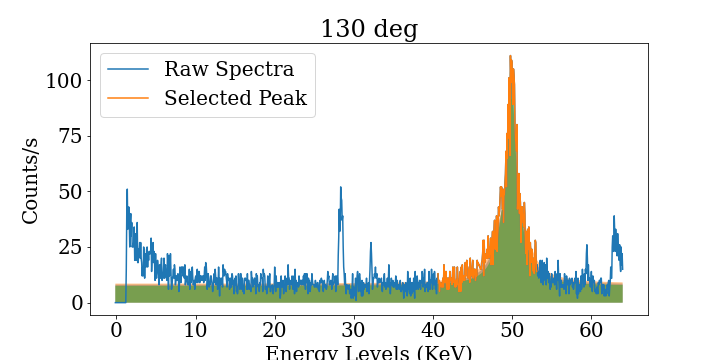

area:  12569.176908358098 13212.054565111463 11923.325853458573


In [254]:
%matplotlib widget
bins = np.linspace(1,1023,1023)
al_data = []

for angle in ['30','50','70','90','110','130']:
    entry = am_al_dict[angle]

    x1 = entry['x1']
    x2 = entry['x2']

    input_x = bins
    input_y = entry['data']

    # Select peak to fit
    xdata = input_x[x1:x2]
    ydata = input_y[x1:x2]

    # Estimate background
    bg = np.mean(input_y[200:400])

    # Plot input spectra with correct scaling
    plt.figure(figsize=(10,5))
    plt.plot(input_x*m+b,input_y, label='Raw Spectra')
    # Plot selected peak to fit
    plt.plot(xdata*m+b, ydata, label='Selected Peak')
    # plt.axhline(bg, linestyle='dashed')

    [A,wc,g,f,y0],pcov = comptonFit(xdata, ydata)
    # offset, amplitude, center, sigma
    [A_err,wc_err,g_err,f_err,y0_err] = np.sqrt(np.diag(pcov))
    print(A,wc,g,f,y0)
    print(A_err,wc_err,g_err,f_err,y0_err)

    # Plot fitted gaussian to peak
    profile = comptonProfile(input_x,A,wc,g,f,y0)
    profile_upper = comptonProfile(input_x,A+A_err,wc+wc_err,g+g_err,f+f_err,y0+y0_err)
    profile_lower = comptonProfile(input_x,A-A_err,wc-wc_err,g-g_err,f-f_err,y0-y0_err)
    
#     plt.plot(input_x*m+b, profile, '--r', label='Fit')
    
#     profile = profile - bg
#     profile[profile < 0] = 0
#     profile_upper = profile_upper - bg
#     profile_upper[profile_upper < 0] = 0
#     profile_lower = profile_lower - bg
#     profile_lower[profile_lower < 0] = 0
    
    plt.fill_between(input_x*m+b, profile, alpha = 0.5)
    plt.fill_between(input_x*m+b, profile_upper, alpha = 0.5)
    plt.fill_between(input_x*m+b, profile_lower, alpha = 0.5)
    # plt.annotate(f'Mean={round(x0*m+b,2)}keV, $\sigma$={round(sigma,2)}, Amplitude={round(A,2)}counts/s',(0.2,0.5), xycoords='figure fraction')
    plt.legend()
    plt.title(angle + ' deg')
    plt.xlabel('Energy Levels (KeV)')
    plt.ylabel('Counts/s')
    plt.show()
    
    print('area: ', np.sum(profile), np.sum(profile_upper), np.sum(profile_lower))
    
    profile_upper_err = np.sum(profile_upper) - np.sum(profile)
    profile_lower_err = np.sum(profile) - np.sum(profile_lower)



    al_data.append(np.array([int(angle),int(am_al_dict[angle]['time']),
                             A,wc*m+b,g,f,y0,A_err,wc_err,g_err,f_err,y0_err, 
                             np.sum(profile),profile_upper_err,profile_lower_err]))



[0. 0. 0. ... 0. 0. 0.]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
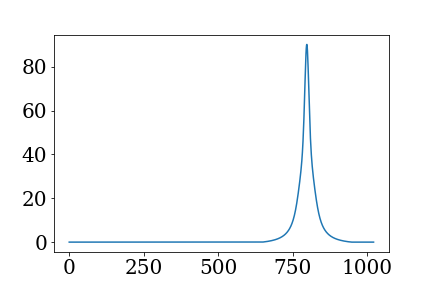

In [172]:
print(profile)
plt.figure()
plt.plot(profile)

In [209]:
#%matplotlib qt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"

In [212]:
# Get fit parameters
(angles_am_al, times_am_al, As_am_al, shifts_am_al, 
sigmas_am_al, fs_am_al, bgs_am_al, As_err_am_al,
shifts_err_am_al, sigmas_err_am_al, fs_err_am_al, bgs_err_am_al,
profiles_al, profiles_upper_err_al, profiles_lower_err_al) = np.transpose(np.array(al_data))

In [213]:
shifts_err_am_al

array([0.23247558, 0.2160053 , 0.32469393, 0.26909976, 0.30098063,
       0.43183621])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
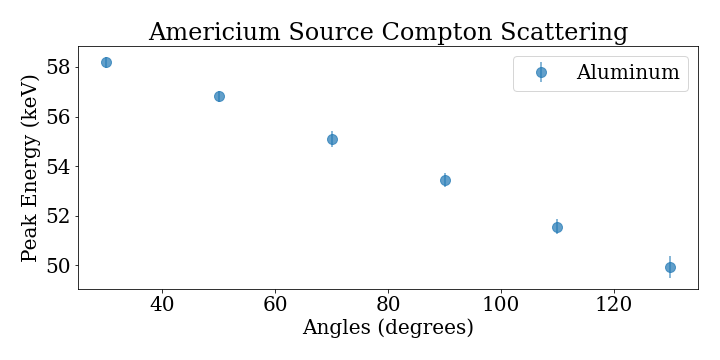

In [214]:

plt.figure(figsize=(10,5))
plt.errorbar(angles_am_al,shifts_am_al,yerr=shifts_err_am_al,fmt='o',markersize = 10,label='Aluminum',alpha=0.7)
# plt.errorbar(angles_am_pb,shifts_am_pb,yerr=shifts_err_am_pb,fmt='o',markersize = 10,label='Lead',alpha=0.7)
plt.xlabel('Angles (degrees)')
plt.ylabel('Peak Energy (keV)')
plt.title('Americium Source Compton Scattering')
plt.legend()
plt.tight_layout()


#### Compare compton shifts to theoretical values

In [177]:
%matplotlib widget
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "sans serif"

In [178]:
mass_of_electron = 9.10938356e-31 #kg
speed_of_light = 299792458 #m/s
E0 = 59.5 #keV
keV = 1000 * 1.602176634e-19 #kg m^2/s^2 = J

thetas = np.linspace(0,180,180)

xrange = 1-np.cos(np.radians(thetas))

calculated_shifts = 1 / (E0*keV) + 1 / (mass_of_electron *  speed_of_light ** 2) * (1-np.cos(np.radians(thetas)))

In [179]:
shifts_am_al

array([58.18485327, 56.81161749, 55.09278155, 53.4386665 , 51.55781397,
       49.92796562])

In [180]:
# Fit compton shifts, slope should correspond to 1 / mc^2, where m is electron mass
(m_am_al,b_am_al),cov = np.polyfit(1-np.cos(np.radians(angles_am_al)), 1/(shifts_am_al), 1, cov=True)
m_am_al_err, b_am_al_err = np.sqrt(np.diag(cov))

thetas = np.linspace(0,180,180)

data_fit = xrange*m_am_al+b_am_al
upper = xrange * (m_am_al+m_am_al_err) + b_am_al + b_am_al_err
lower = xrange * (m_am_al-m_am_al_err) + b_am_al - b_am_al_err

In [146]:
shifts_err_am_al/shifts_am_al

array([0.00399547, 0.00380213, 0.00589358, 0.00503568, 0.00583773,
       0.00864918])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
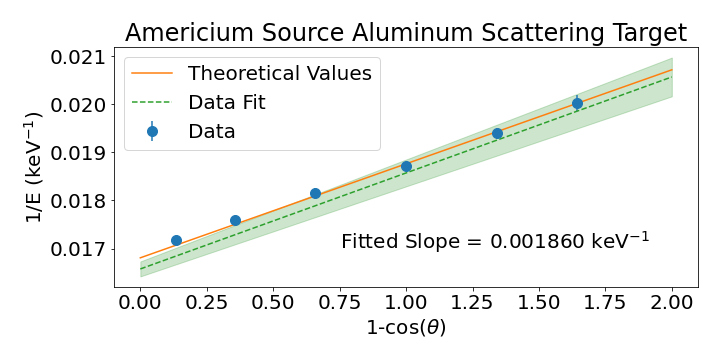

In [264]:
# Plot compton shifts
plt.figure(figsize=(10,5))
plt.errorbar(1-np.cos(np.radians(angles_am_al)), 1/(shifts_am_al),yerr=(shifts_err_am_al/shifts_am_al**2),fmt='o',markersize = 10, label = 'Data')
plt.plot(xrange, calculated_shifts * keV, label = 'Theoretical Values')
# plt.plot(1-np.cos(np.radians(thetas)), calculated_shifts_adjusted * keV, label = 'Theoretical Values Adjusted')
plt.plot(xrange,data_fit, '--', label = 'Data Fit')
plt.fill_between(xrange, lower, upper,color='green', alpha = 0.2)
plt.xlabel(r'1-cos($\theta$)')
plt.ylabel(r'1/E (keV$^{-1}$)')
plt.annotate('Fitted Slope = %4f keV$^{-1}$'%(m_am_al),(0.75,0.017))
plt.title('Americium Source Aluminum Scattering Target')
plt.legend()
plt.tight_layout()


In [148]:
m_am_al

0.0018597128558009185

# Lead

In [149]:
files = glob.glob('Americium_Lead/*.Spe')
am_pb_dict = {}

%matplotlib inline
for f in files:
    angle = f.split('AmericiumPb')[1].split('degrees')[0]
    time = f.split('volts')[1].split('sec')[0]
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    am_pb_dict[angle] = entry

In [150]:
am_pb_dict['50']['x1'] = 850
am_pb_dict['50']['x2'] = 935

am_pb_dict['70']['x1'] = 850
am_pb_dict['70']['x2'] = 935

am_pb_dict['90']['x1'] = 800
am_pb_dict['90']['x2'] = 920

am_pb_dict['110']['x1'] = 750
am_pb_dict['110']['x2'] = 900

am_pb_dict['130']['x1'] = 700
am_pb_dict['130']['x2'] = 850

am_pb_dict['150']['x1'] = 700
am_pb_dict['150']['x2'] = 850

# am_al_dict['150']['x1'] = 650
# am_al_dict['150']['x2'] = 800

In [236]:
input_x

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.021e+03, 1.022e+03,
       1.023e+03])

224112.0 917.0 66 2.2664905191833746
4076.723041751089 919.0809524182254 3.8030103473684695 2.124762961256576 189.41216808584855
234.52642566364545 0.2240456608083383 0.1975305275846368 0.0527796213684717 2.4802427545927865


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
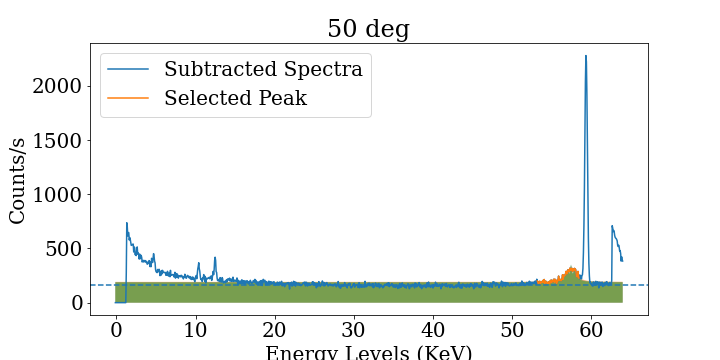

area:  197733.58117692382 200489.49800721358 194976.3318430282
213672.0 888.0 37 1.702826811878225
2735.0487450321393 891.0737921345925 5.667769829157782 1.9548401735418053 188.11069842906346
431.6177981129804 0.578228114899773 0.6896445498448136 0.10516983965114624 4.1099025060274395


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
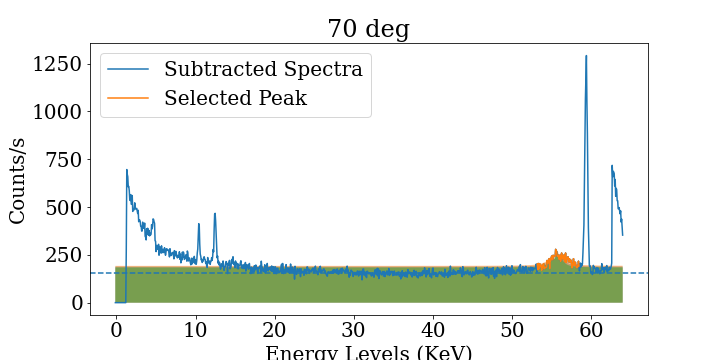

area:  195088.66802767356 199693.48441715553 190477.92370719626
209805.0 857.0 56 2.4921739161526903
3688.5678953461315 870.9093608486925 7.816999402305214 2.2664109992918053 169.44117131841176
369.2425002992366 0.5278304799869161 0.4436012440607615 0.05841430773808343 2.538757068506568


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
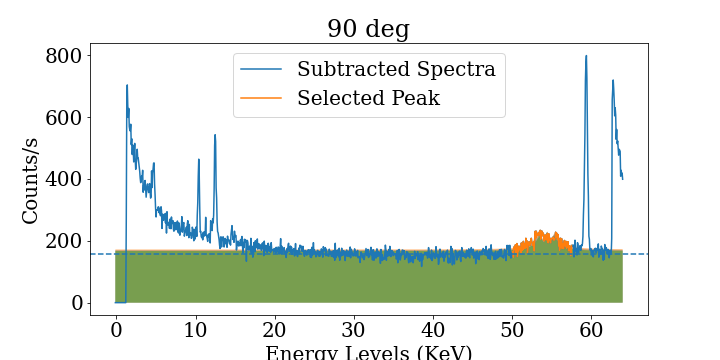

area:  176866.78851789387 179801.83253040756 173928.46719033155
198655.0 832.0 81 3.3552324292858193
2779.2645711517084 833.3368071600264 12.575096581590588 1.8503622741956616 154.37196514770332
659.0493665723013 1.4186465616822599 2.161370618604661 0.13567512935082468 3.189840869527608


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
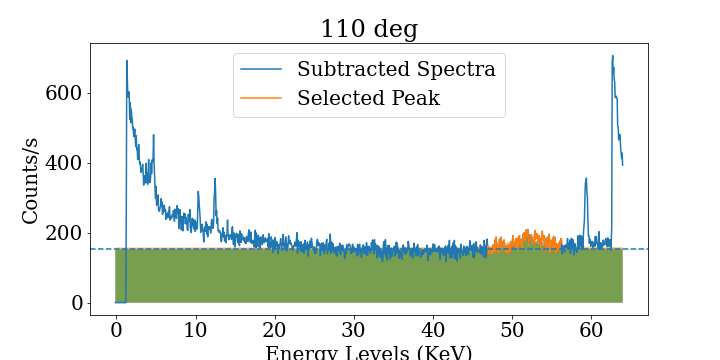

area:  160568.97940788165 164416.2863304094 156702.1943034688
199484.0 811.0 110 4.228453502779614
8503.555286062881 808.7305344488985 34.10680822483038 1.1650318518145895 137.92782979454583
3783.8808069233146 1.2885732332158633 5.794857757097379 0.32842400159319446 9.910354577616177


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
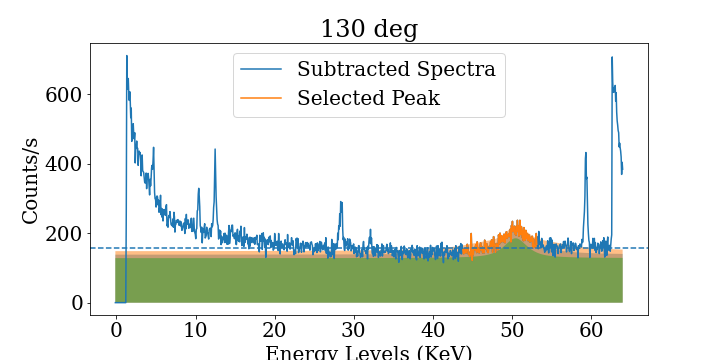

area:  148974.08638404243 162158.88834674098 135473.70965750806
184909.0 783.0 82 3.4136082593650086
3980.823759320333 780.8492755075421 8.549008234964903 1.6836199361125483 141.4038723852982
371.5354419822238 0.5326144375593084 0.9780707736514977 0.09179302697291043 2.133582739994176


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
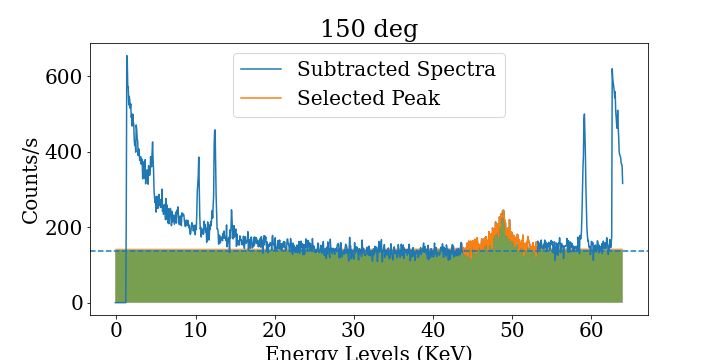

area:  148538.48292825028 151064.43382153055 146008.12295213217


In [242]:
%matplotlib widget
bins = np.linspace(1,1023,1023)
pb_data = []

for angle in ['50','70','90','110','130','150']:
    entry = am_pb_dict[angle]

    x1 = entry['x1']
    x2 = entry['x2']

    input_x = bins
    input_y = entry['data']

    # Select peak to fit
    xdata = input_x[x1:x2]
    ydata = input_y[x1:x2]

    # Estimate background
    bg = np.mean(input_y[400:600])

    # Plot input spectra with correct scaling
    plt.figure(figsize=(10,5))
    plt.plot(input_x*m+b,input_y, label='Subtracted Spectra')
    # Plot selected peak to fit
    plt.plot(xdata*m+b, ydata, label='Selected Peak')
    plt.axhline(bg, linestyle='dashed')

    [A,wc,g,f,y0],pcov = comptonFit(xdata, ydata)
    # offset, amplitude, center, sigma
    [A_err,wc_err,g_err,f_err,y0_err] = np.sqrt(np.diag(pcov))
    print(A,wc,g,f,y0)
    print(A_err,wc_err,g_err,f_err,y0_err)


    # Plot fitted gaussian to peak
    profile = comptonProfile(input_x,A,wc,g,f,y0)
    profile_upper = comptonProfile(input_x,A+A_err,wc+wc_err,g+g_err,f+f_err,y0+y0_err)
    profile_lower = comptonProfile(input_x,A-A_err,wc-wc_err,g-g_err,f-f_err,y0-y0_err)
    
#     plt.plot(input_x*m+b, profile, '--r', label='Fit')
    
#     profile = profile - bg
#     profile[profile < 0] = 0
#     profile_upper = profile_upper - bg
#     profile_upper[profile_upper < 0] = 0
#     profile_lower = profile_lower - bg
#     profile_lower[profile_lower < 0] = 0
    
    plt.fill_between(input_x*m+b, profile, alpha = 0.5)
    plt.fill_between(input_x*m+b, profile_upper, alpha = 0.5)
    plt.fill_between(input_x*m+b, profile_lower, alpha = 0.5)
    # plt.annotate(f'Mean={round(x0*m+b,2)}keV, $\sigma$={round(sigma,2)}, Amplitude={round(A,2)}counts/s',(0.2,0.5), xycoords='figure fraction')
    plt.legend()
    plt.title(angle + ' deg')
    plt.xlabel('Energy Levels (KeV)')
    plt.ylabel('Counts/s')
    plt.show()
    
    print('area: ', np.sum(profile), np.sum(profile_upper), np.sum(profile_lower))
    
    profile_upper_err = np.sum(profile_upper) - np.sum(profile)
    profile_lower_err = np.sum(profile) - np.sum(profile_lower)



    pb_data.append(np.array([int(angle),int(am_pb_dict[angle]['time']),
                             A,wc*m+b,g,f,y0,A_err,wc_err,g_err,f_err,y0_err, 
                             np.sum(profile),profile_upper_err,profile_lower_err]))



In [243]:
# Get fit parameters
(angles_am_pb, times_am_pb, As_am_pb, shifts_am_pb, 
 sigmas_am_pb, fs_am_pb, bgs_am_pb, As_err_am_pb,
 shifts_err_am_pb, sigmas_err_am_pb, fs_err_am_pb, bgs_err_am_pb, 
 profiles_pb, profiles_upper_err_pb, profiles_lower_err_pb)= np.transpose(np.array(pb_data))

#### Compare compton shifts to theoretical values

In [244]:
%matplotlib widget
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
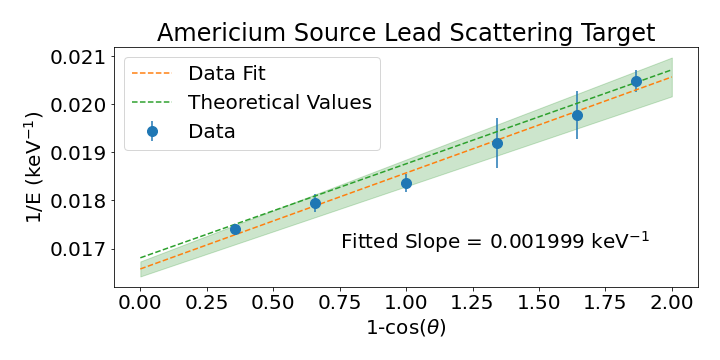

In [265]:
# Constants
mass_of_electron = 9.10938356e-31 #kg
speed_of_light = 299792458 #m/s
E0 = 59.5 #keV
keV = 1000 * 1.602176634e-19 #kg m^2/s^2 = J

thetas = np.linspace(0,180,180)
xrange = 1-np.cos(np.radians(thetas))
calculated_shifts = 1 / (E0*keV) + 1 / (mass_of_electron *  speed_of_light ** 2) * (1-np.cos(np.radians(thetas)))

# Fit compton shifts, slope should correspond to 1 / mc^2, where m is electron mass
(m_am_pb,b_am_pb), cov = np.polyfit(1-np.cos(np.radians(angles_am_pb)), 1/(shifts_am_pb), 1, cov=True)
m_am_pb_err, b_am_pb_err = np.sqrt(np.diag(cov))

data_fit = xrange*m_am_pb+b_am_pb
upper = xrange * (m_am_pb+m_am_pb_err) + b_am_pb + b_am_pb_err
lower = xrange * (m_am_pb-m_am_pb_err) + b_am_pb - b_am_pb_err


plt.figure(figsize=(10,5))
plt.errorbar(1-np.cos(np.radians(angles_am_pb)), 1/(shifts_am_pb),yerr=shifts_err_am_pb/shifts_am_pb**2,fmt='o',markersize = 10, label = 'Data')
plt.plot(xrange,data_fit, '--', label = 'Data Fit')
plt.fill_between(xrange, lower, upper,color='green', alpha = 0.2)

# plt.plot(1-np.cos(np.radians(thetas)), calculated_shifts_adjusted * keV, label = 'Theoretical Values Adjusted')
plt.plot(xrange, calculated_shifts * keV, '--', label ='Theoretical Values')
plt.xlabel(r'1-cos($\theta$)')
plt.ylabel(r'1/E (keV$^{-1}$)')
plt.annotate('Fitted Slope = %4f keV$^{-1}$'%(m_am_pb),(0.75,0.017))
plt.title('Americium Source Lead Scattering Target')
plt.legend()
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
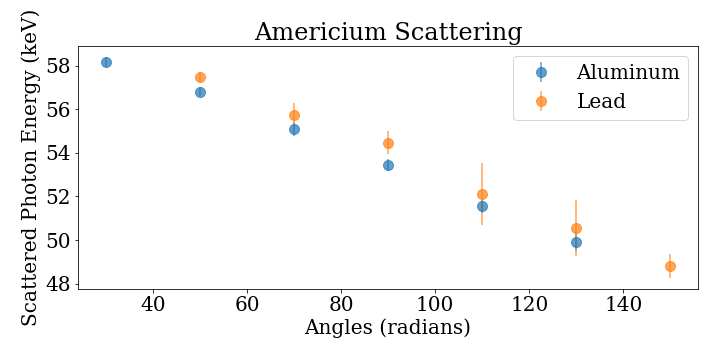

In [246]:
%matplotlib widget
plt.figure(figsize=(10,5))
plt.errorbar(angles_am_al, shifts_am_al,yerr=shifts_err_am_al,fmt='o', markersize = 10, label='Aluminum',alpha = 0.7)
plt.errorbar(angles_am_pb, shifts_am_pb,yerr=shifts_err_am_pb,fmt='o', markersize = 10, label='Lead',alpha=0.7)
plt.xlabel('Angles (radians)')
plt.ylabel('Scattered Photon Energy (keV)')
plt.title('Americium Scattering')
plt.legend()
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
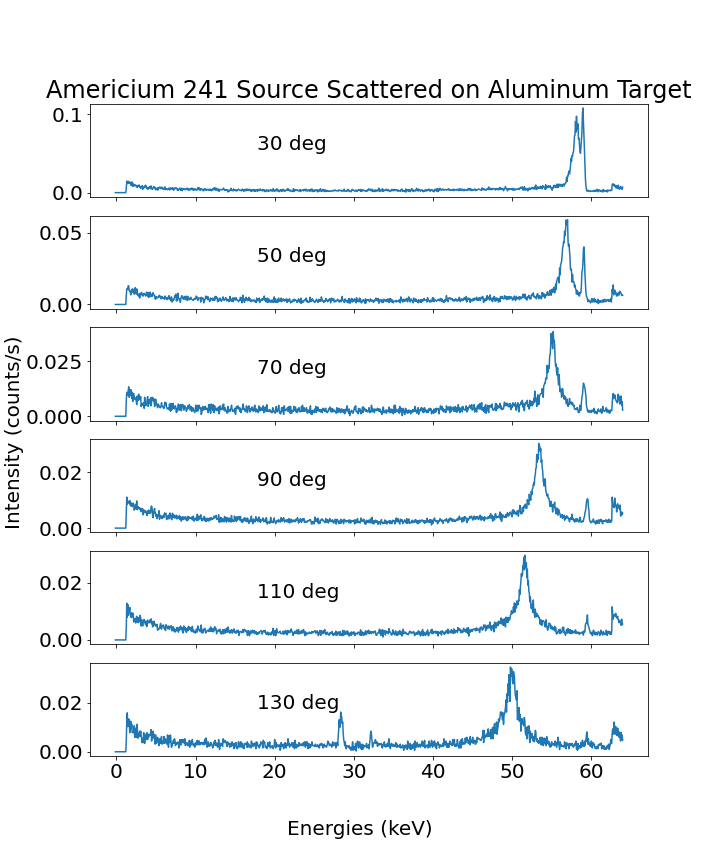

In [365]:
f, axes = plt.subplots(6, 1, sharex=True, figsize=(10,12))
axes[0].set_title('Americium 241 Source Scattered on Aluminum Target')
# ax7.set_xlabel('Energies (keV)')
# Make common axis labels
f.text(0.5, 0.04, 'Energies (keV)', va='center', ha='center')
f.text(0.02, 0.5, 'Intensity (counts/s)', va='center', ha='center', rotation='vertical')
angles =['30','50','70','90','110','130']
for i in range(len(angles)):
    axes[i].plot(bins*m+b,am_al_dict[angles[i]]['data']/int(am_al_dict[angles[i]]['time']))
    axes[i].annotate(angles[i]+' deg', (0.3,0.5), xycoords='axes fraction')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
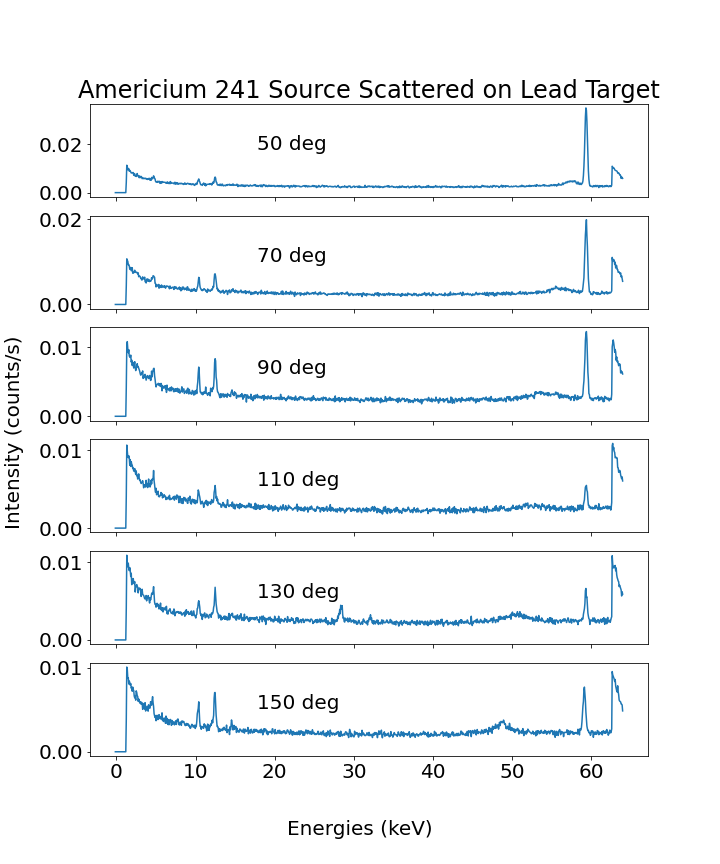

In [364]:
f, axes = plt.subplots(6, 1, sharex=True, figsize=(10,12))
axes[0].set_title('Americium 241 Source Scattered on Lead Target')
# ax7.set_xlabel('Energies (keV)')
# Make common axis labels
f.text(0.5, 0.04, 'Energies (keV)', va='center', ha='center')
f.text(0.02, 0.5, 'Intensity (counts/s)', va='center', ha='center', rotation='vertical')
angles = ['50','70','90','110','130','150']
for i in range(len(angles)):
    axes[i].plot(bins*m+b, am_pb_dict[angles[i]]['data']/int(am_pb_dict[angles[i]]['time']))
    axes[i].annotate(angles[i]+' deg', (0.3,0.5), xycoords='axes fraction')

# Cross Section

In [76]:
re = 2.818e-13 #cm classical radiums of the electron
keV_g = 1.602176634e-9 #g cm^2/s^2 = erg
speed_of_light_cm = 29979245800 #cm/s
mass_of_electron = 9.10938356e-31 #kg
mass_of_electron_g = 9.10938356e-28 #kg
# plank = 6.62607004e-34
compton_wavelength = 2.42631023867e-12 #m
compton_wavelength_cm = 2.42631023867e-10 #cm


r = 25.5 #cm, distance from target to detector
h_target = 7.7 #cm
d_target = 1.9 #cm
crystal_area = 5.08 * 5.08 #cm**2

N0 = 6e23 #Avogadro's number
# What is the Cs's Currie?
I0 = 3.7e10 * 3.69e-3 / (4 * np.pi * r**2) # 1/(cm^2 s)

A_al = 26.9 #atomic weight of aluminum
A_pb = 207.2 #atomic weight of Lead
Z_al = 13 #atomic number of aluminum
Z_pb = 82 #atomic number of Lead

rho_al = 2.7 #g/cm^3
rho_pb = 11.35 #g/cm^3

N_al = np.pi * ( d_target / 2) **2 * h_target * rho_al * N0 / A_al * Z_al
N_pb = np.pi * ( d_target / 2) **2 * h_target * rho_pb * N0 / A_pb * Z_pb


In [340]:
def Klein_Nishina(E0, theta):
    a = E0 * keV_g / (mass_of_electron_g *  speed_of_light_cm ** 2) # should be 1.29 for 662 keV
    cos = np.cos(np.radians(theta))
    return (re ** 2) * ((1+cos**2) / 2) * ( 1 / (1 + a * (1-cos)) **2 ) * (1 + a**2*(1-cos)**2 / (1+cos**2) / (1 + a*(1-cos)))

def Klein_Nishina_Etheta(E0, E_theta, E_theta_err, theta):
    PE = E_theta/E0
    result = 1 / 2 * re ** 2 * PE ** 2 * (  PE + 1/PE - np.sin(np.radians(theta)) ** 2)
    error = np.sqrt( (3 * E_theta_err / E_theta)**2 + ( E_theta_err / E_theta ) **2) * result
    return result, error

def Compton_Shift(E0, theta):
    return 1 / (E0*keV) + 1 / (mass_of_electron *  speed_of_light ** 2) * (1-np.cos(np.radians(thetas)))
 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
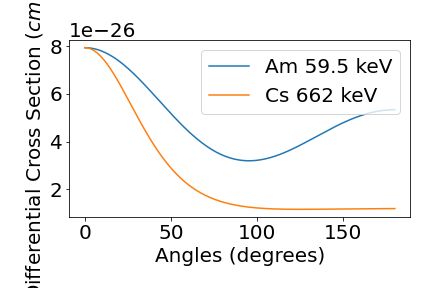

In [356]:
plt.figure()
plt.plot(thetas, Klein_Nishina(59.5, thetas), label='Am 59.5 keV')
plt.plot(thetas, Klein_Nishina(662, thetas), label = 'Cs 662 keV')
plt.xlabel('Angles (degrees)')
plt.ylabel('Differential Cross Section ($cm^2/sr$)')
plt.legend()
plt.tight_layout()

In [342]:
662 * keV_g / (mass_of_electron_g *  speed_of_light_cm ** 2)

1.295501703649493

In [343]:
1/ (mass_of_electron *  speed_of_light ** 2) * keV

0.001956951213972044

In [344]:
Klein_Nishina(662, 5)

7.833632669726402e-26

#### Theoretical values using Klein-Nishina

In [345]:
%matplotlib widget
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "sans serif"

In [352]:
thetas = np.linspace(0,180,180)
# E_thetas = Compton_Energy(59.5, thetas)
diff_cross_secs = Klein_Nishina(59.5, thetas)
plt.plot(thetas,diff_cross_secs)

In [347]:
plt.plot(angles_am_al,shifts_am_al,'o')

In [348]:
pb_kn, pb_kn_err

((array([6.64660627e-26, 5.12324547e-26, 3.82251994e-26, 3.23980376e-26,
         3.39135843e-26, 4.03718342e-26]),),
 array([8.39783513e-28, 6.15988228e-28, 7.12408721e-28, 5.15912928e-28,
        6.26062569e-28, 1.10421505e-27]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
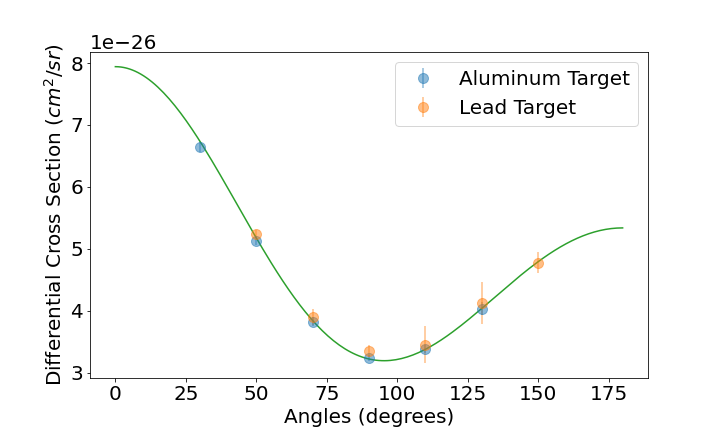

In [361]:
# plt.figure(figsize=(20,10))
plt.figure(figsize=(10,6))

pb_kn, pb_kn_err = Klein_Nishina_Etheta(59.5, shifts_am_al , shifts_err_am_al, angles_am_al)
al_kn, al_kn_err = Klein_Nishina_Etheta(59.5, shifts_am_pb , shifts_err_am_pb, angles_am_pb)

plt.errorbar(angles_am_al,pb_kn, pb_kn_err ,fmt='o',markersize = 10, alpha=0.5, label = 'Aluminum Target')
plt.errorbar(angles_am_pb,al_kn, al_kn_err ,fmt='o',markersize = 10, alpha=0.5,label = 'Lead Target' )
plt.plot(thetas,diff_cross_secs)
# plt.title('Differential Cross Section of Scattered Americium')
plt.xlabel('Angles (degrees)')
plt.ylabel('Differential Cross Section ($cm^2/sr$)')
plt.legend()
# plt.plot(thetas, 1 / E_thetas,'o')

#### Calculated Values

In [263]:
np.array(As_am_al) / ( (crystal_area / r ** 2) * N_al * I0)

array([7.13818291e-25, 4.63409446e-25, 3.45134076e-25, 8.21342540e-25,
       8.57191607e-25, 4.00503249e-25])

In [88]:
Klein_Nishina(59.5, 130)

4.0397606907008906e-26

In [270]:
np.mean(diff_cross_secs) / np.mean(profiles_pb)

2.876896118171735e-31

[Text(0, 2000.0, ''),
 Text(0, 4000.0, ''),
 Text(0, 6000.0, ''),
 Text(0, 8000.0, ''),
 Text(0, 10000.0, ''),
 Text(0, 12000.0, '')]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
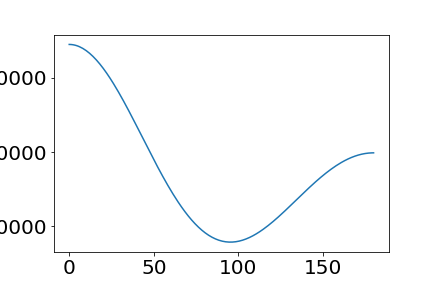

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
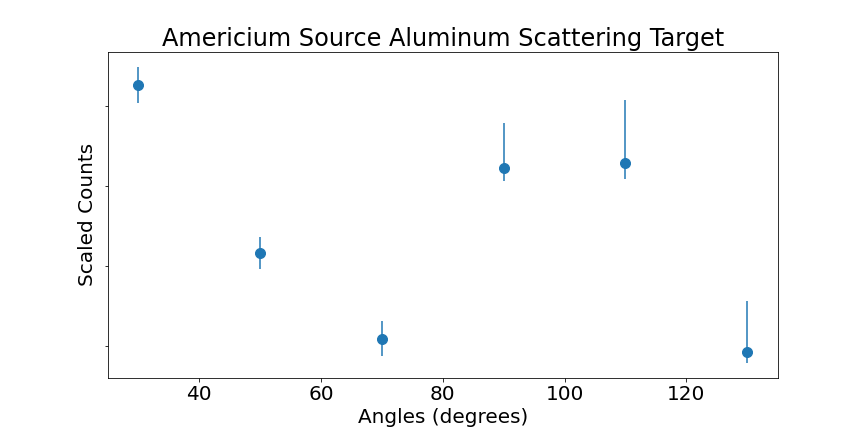

In [362]:
%matplotlib widget

# plt.figure()
# # al_const = ((crystal_area / r ** 2) * N_al * I0)
# # pb_const = ((crystal_area / r ** 2) * N_pb * I0)
# plt.errorbar(angles_am_pb,As_am_al ,yerr = As_err_am_pb,fmt='o')
# # plt.errorbar(angles_am_pb,np.array(As_am_pb) / pb_const,yerr = As_err_am_pb/pb_const ,fmt='o')
plt.plot(thetas, diff_cross_secs*2.8e30)
# plt.xlabel('Angles')
# plt.ylabel('Cross Section')
# plt.title('Cesium Source Aluminum Scattering Target')

plt.figure(figsize=(12,6))
# plt.errorbar(angles_am_al,profiles_al, np.vstack((profiles_upper_err_al, profiles_lower_err_al)), fmt='o')
plt.errorbar(angles_am_al,profiles_al, np.vstack((profiles_upper_err_al, profiles_lower_err_al)), fmt='o',markersize=10,label = 'Area Under Peak')

plt.xlabel('Angles (degrees)')
plt.ylabel('Scaled Counts')
plt.title('Americium Source Aluminum Scattering Target')
plt.gca().yaxis.set_ticklabels([])


[Text(0, 130000.0, ''),
 Text(0, 140000.0, ''),
 Text(0, 150000.0, ''),
 Text(0, 160000.0, ''),
 Text(0, 170000.0, ''),
 Text(0, 180000.0, ''),
 Text(0, 190000.0, ''),
 Text(0, 200000.0, ''),
 Text(0, 210000.0, '')]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
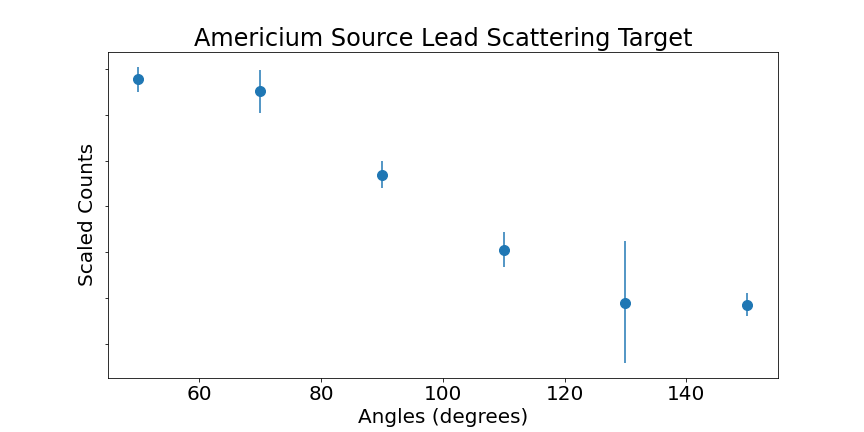

In [363]:

plt.figure(figsize=(12,6))
# plt.errorbar(angles_am_al,profiles_al, np.vstack((profiles_upper_err_al, profiles_lower_err_al)), fmt='o')
plt.errorbar(angles_am_pb,profiles_pb, np.vstack((profiles_upper_err_pb, profiles_lower_err_pb)), fmt='o',markersize=10,label = 'Area Under Peak')

plt.xlabel('Angles (degrees)')
plt.ylabel('Scaled Counts')
plt.title('Americium Source Lead Scattering Target')
plt.gca().yaxis.set_ticklabels([])


In [ ]:
np.mean(np.array(As_am_al) / Klein_Nishina_Etheta(59.5, shifts_am_al , angles_am_al))

In [190]:
%matplotlib qt

plt.figure(figsize=(10,5))
# plt.plot(angles_cs_al,np.array(As_cs_al)/As_cs_al[0] / ( (crystal_area / r ** 2) * N_al * I0),'o',label='Measured')
plt.errorbar(angles_am_al,np.array(As_am_al),yerr=As_err_am_al,fmt='o',label='Measured')
# plt.plot(angles_am_al, Klein_Nishina_Etheta(59.5, shifts_am_al , angles_am_al)*7.7e23,'o',markersize = 10, alpha=0.5, label = 'Klein-Nishina')
# plt.plot(thetas, diff_cross_secs*7.7e23)

plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Americium Source Aluminum Scattering Target')
plt.legend()



In [ ]:
%matplotlib qt

plt.figure(figsize=(12,6))
plt.errorbar(angles_am_al,np.array(As_am_al) / al_const ,yerr = As_err_am_al/al_const ,fmt='o',label='Measured')
plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Americium Source Aluminum Scattering Target')
plt.legend()
plt.tight_layout()

# plt.figure(figsize=(10,5))
# plt.plot(angles_am_al, Klein_Nishina_Etheta(59.5, shifts_am_al , angles_am_al),'o',markersize = 10, alpha=0.5, label = 'Klein-Nishina')
# plt.xlabel('Angles (degrees)')
# plt.ylabel('Cross Section (cm^2/sr)')
# plt.title('Americium Source Aluminum Scattering Target')
# plt.legend()
# plt.tight_layout()

plt.figure(figsize=(12,6))
plt.errorbar(angles_am_pb,np.array(As_am_pb) / pb_const,yerr = As_err_am_pb/pb_const ,fmt='o',label='Measured')
# plt.plot(thetas, diff_cross_secs)
plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Americium Source Lead Scattering Target')
plt.legend()
plt.tight_layout()

# plt.figure(figsize=(10,5))
# plt.plot(angles_am_pb, Klein_Nishina_Etheta(59.5, shifts_am_pb , angles_am_pb),'o',markersize = 10, alpha=0.5,label = 'Klein-Nishina' )
# # plt.plot(thetas, diff_cross_secs)
# plt.xlabel('Angles (degrees)')
# plt.ylabel('Cross Section (cm^2/sr)')
# plt.title('Americium Source Lead Scattering Target')
# plt.legend()
# plt.tight_layout()